<a href="https://colab.research.google.com/github/cool543/pan/blob/master/ring-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# core and utility packages
import pandas as pd
import numpy as np
import itertools
import keras


# visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

# Load the data
train = pd.read_csv("ring_train.csv")
test = pd.read_csv("ring_test.csv")
test2 = pd.read_csv("real.csv")
train.head()

Using TensorFlow backend.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V2930,V2931,V2932,V2933,V2934,V2935,V2936,V2937,V2938,V2939,V2940,V2941,V2942,V2943,V2944,V2945,V2946,V2947,V2948,V2949,V2950,V2951,V2952,V2953,V2954,V2955,V2956,V2957,V2958,V2959,V2960,V2961,V2962,V2963,V2964,V2965,V2966,V2967,V2968,V2969
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
Y_train = train["V1"]
Y_test = test["V1"]
X_train = train.drop(labels = ["V1"],axis = 1) 
test = test.drop(labels = ["V1"],axis = 1) 
X_train.shape


(12000, 2968)

In [3]:
X_train = X_train.values.reshape(-1,53,56,1)
test = test.values.reshape(-1,53,56,1)
test2 = test2.values.reshape(-1,53,56,1)
print(X_train)
print(test)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [0]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_train, num_classes=2)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
cnn=Sequential()
cnn.add(Conv2D(filters=32,
               kernel_size=(5,5),
               input_shape=(53,56,1),
               activation="relu",
               padding="same")) #3(RGB共3個特徵)*3*3(3*3過濾器)*32(過濾器)+32(bias 激活個數)
cnn.add(MaxPool2D(pool_size=(2,2)))#池化
cnn.add(Conv2D(filters=64,
               kernel_size=(3,3),
               activation="relu",
               padding="same"))#32(32個特徵)*3*3(3*3過濾器)*64(過濾器)+64(bias 激活個數)
###後面沒有再加卷積就沒必要再池化
cnn.add(MaxPool2D(pool_size=(2,2),strides=2))#池化
cnn.add(Conv2D(filters=128,
               kernel_size=(3,3),
               activation="relu",
               padding="same"))#32(32個特徵)*3*3(3*3過濾器)*64(過濾器)+64(bias 激活個數)
cnn.add(MaxPool2D(pool_size=(2,2)))#池化

cnn.add(Flatten())###MLP前要先展平
#cnn.add(Dense(units=1024,activation="relu"))##原本一萬多減一個位數取1000多
#cnn.add(Dense(units=128,activation="relu"))
#cnn.add(Dense(units=10,activation="softmax"))

cnn.add(Dense(units=625,activation="relu")) ###為了隨機dropout數量才增多一點
cnn.add(Dropout(0.5))
cnn.add(Dense(units=2,activation="softmax"))


cnn.summary()

W0829 18:53:26.127534 139750544967552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 18:53:26.178077 139750544967552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 18:53:26.185694 139750544967552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 18:53:26.222055 139750544967552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0829 18:53:26.273250 139750544967552 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 53, 56, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5376)             

In [6]:
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

train_history=cnn.fit(X_train,Y_train,batch_size=256,epochs=40,
          validation_split=0.2,verbose=2)##verbose 是否印出log  2表示印出重要log即可不用太詳細
#validation loss 沒平坦 epochs就要再加

W0829 18:53:26.319086 139750544967552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 18:53:26.345605 139750544967552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0829 18:53:26.454330 139750544967552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9600 samples, validate on 2400 samples
Epoch 1/40
 - 10s - loss: 0.2884 - acc: 0.8959 - val_loss: 0.0166 - val_acc: 0.9938
Epoch 2/40
 - 2s - loss: 0.0153 - acc: 0.9941 - val_loss: 0.0181 - val_acc: 0.9937
Epoch 3/40
 - 2s - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0054 - val_acc: 0.9979
Epoch 4/40
 - 2s - loss: 0.0054 - acc: 0.9983 - val_loss: 0.0029 - val_acc: 0.9992
Epoch 5/40
 - 2s - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0033 - val_acc: 0.9983
Epoch 6/40
 - 2s - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0073 - val_acc: 0.9975
Epoch 7/40
 - 2s - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0036 - val_acc: 0.9988
Epoch 8/40
 - 2s - loss: 4.3136e-04 - acc: 0.9999 - val_loss: 0.0048 - val_acc: 0.9983
Epoch 9/40
 - 2s - loss: 2.7738e-04 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 10/40
 - 2s - loss: 1.4701e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 0.9988
Epoch 11/40
 - 2s - loss: 8.3257e-05 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 0.9996
Epoch 12/40
 - 2s - 

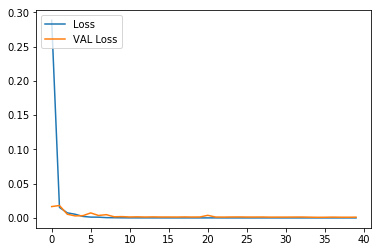

In [7]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.legend(["Loss","VAL Loss"],loc="upper left")

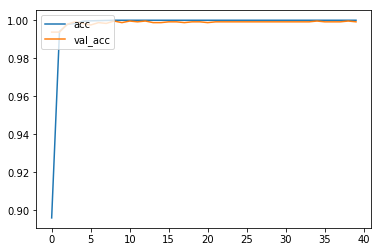

In [8]:
plt.plot(train_history.history["acc"])
plt.plot(train_history.history["val_acc"])
plt.legend(["acc","val_acc"],loc="upper left")

In [9]:
predictions = cnn.predict_classes(test, verbose=1)
test1 = pd.read_csv("ring_test.csv")
predictions_real = cnn.predict_classes(test2, verbose=1)
dataframe = pd.DataFrame({'a_name':predictions,'b_name':test1["V1"]})
dataframe_real = pd.DataFrame({'a_name':predictions_real})
#將DataFrame儲存為csv,index表示是否顯示行名，default=True
dataframe.to_csv("predictions_ring.csv",index=False,sep=',')
dataframe.to_csv("predictions_ring_real.csv",index=False,sep=',')

47/47 [==============================] - 0s 411us/step


In [0]:
#https://support.hdfgroup.org/products/java/
cnn.save("ring.h5")

In [0]:
from keras.models import load_model
loadcnn=load_model("ring.h5")
loadcnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
predictions = loadcnn.predict_classes(test, verbose=1)

2400/2400 [==============================] - 0s 192us/step
